# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [76]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [97]:
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [78]:
filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [79]:
#I want to predict GINI based on WHR data.

In [80]:
df.shape 
#19 columns and 1562 rows
df.head(5)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [81]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

#all three Gini index features have significant missing vaues, as well as confident in national gov, democratic quality, and delivery quality
#I will use the Gini index with least nulls as my label, and drop the other gini index values

df = df.drop(columns=df.columns[df.isnull().sum() > 300])

In [82]:
df.corr()["GINI index (World Bank estimate), average 2000-15"]
#none of the values or too strongly correlated with the label, so I don't need to drop any

year                                                -0.026927
Life Ladder                                         -0.172745
Log GDP per capita                                  -0.314639
Social support                                      -0.128284
Healthy life expectancy at birth                    -0.364279
Freedom to make life choices                         0.057697
Generosity                                          -0.043810
Perceptions of corruption                            0.170775
Positive affect                                      0.298045
Negative affect                                      0.074559
Confidence in national government                    0.051886
Democratic Quality                                  -0.197884
Delivery Quality                                    -0.309608
Standard deviation of ladder by country-year         0.343730
Standard deviation/Mean of ladder by country-year    0.299033
GINI index (World Bank estimate), average 2000-15    1.000000
Name: GI

In [83]:
#dropping non numerical values
df.dtypes
df=df.drop(columns=["country"])

In [85]:
#replacing mini values
tbr = list(df.isnull())

for feature in tbr:
    mean = df[feature].mean()
    newname = (feature + "_na")
    df[newname] = df[feature].isnull()
    df[feature].fillna(value=mean, inplace=True)

nan_count = np.sum(df.isnull(), axis = 0)
nan_count

year                                                    0
Life Ladder                                             0
Log GDP per capita                                      0
Social support                                          0
Healthy life expectancy at birth                        0
Freedom to make life choices                            0
Generosity                                              0
Perceptions of corruption                               0
Positive affect                                         0
Negative affect                                         0
Confidence in national government                       0
Democratic Quality                                      0
Delivery Quality                                        0
Standard deviation of ladder by country-year            0
Standard deviation/Mean of ladder by country-year       0
GINI index (World Bank estimate), average 2000-15       0
year_na                                                 0
Life Ladder_na

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Life Ladder'}>,
        <AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy at birth'}>],
       [<AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Positive affect'}>,
        <AxesSubplot:title={'center':'Negative affect'}>],
       [<AxesSubplot:title={'center':'Confidence in national government'}>,
        <AxesSubplot:title={'center':'Democratic Quality'}>,
        <AxesSubplot:title={'center':'Delivery Quality'}>,
        <AxesSubplot:title={'center':'Standard deviation of ladder by country-year'}>],
       [<AxesSubplot:title={'center':'Standard deviation/Mean of ladder by country-year'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

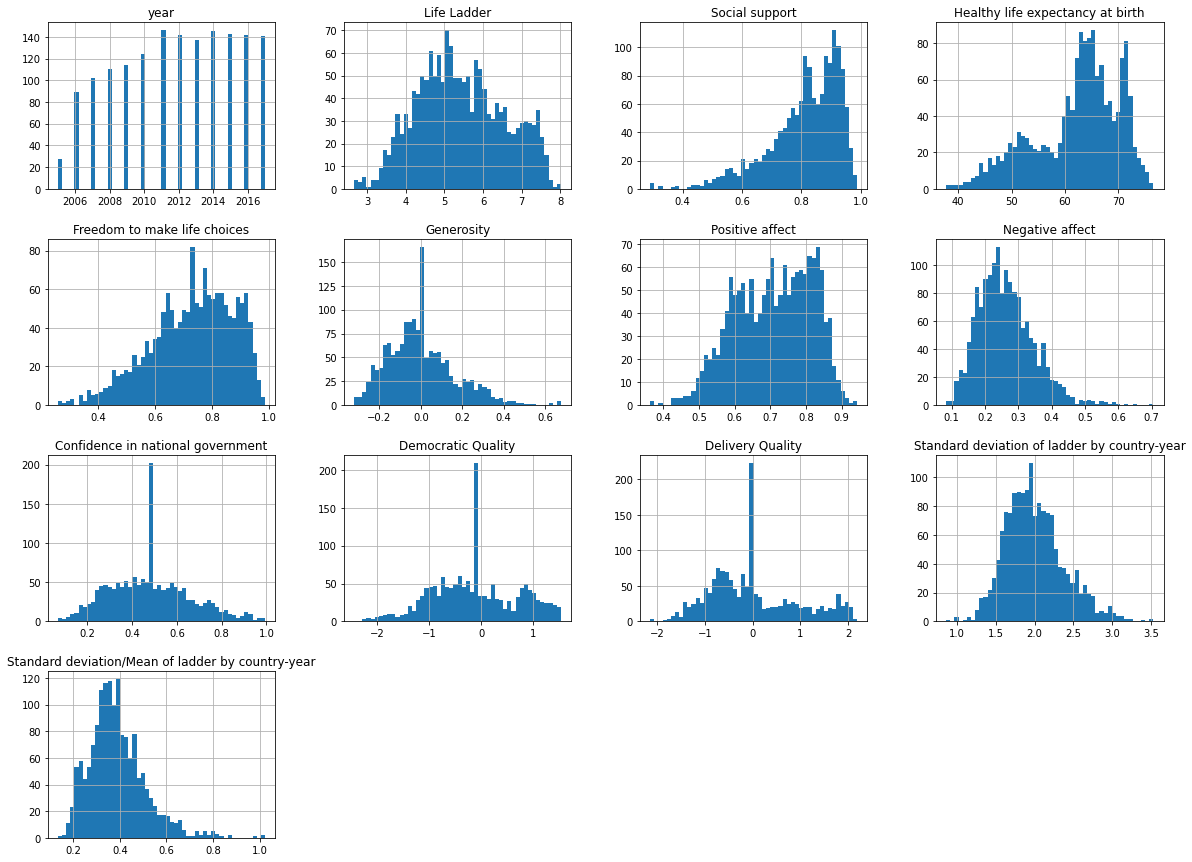

In [91]:
#winsiorizing values:

X = df.filter(regex="[^_na]$").drop(columns=["GINI index (World Bank estimate), average 2000-15"])
y = df["GINI index (World Bank estimate), average 2000-15"]
X.hist(bins=50, figsize=(20,15))
#bc my label doesn't have a normal distribution, I won't winsiorize

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)


In [95]:
num_examples = X_train.shape[0]
K = np.linspace(2, np.sqrt(num_examples), num = 10)
x=[]
for n in K:
    x.append(int(n))
param_grid = {'n_estimators': list(x)}

param_grid

{'n_estimators': [2, 5, 8, 12, 15, 18, 22, 25, 28, 32]}

In [98]:
#find hyperparamters using Gridsearch
model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid, cv = 5 )
grid_search = grid.fit(X_train, y_train)

In [99]:
best = grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=28, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
rf_model = RandomForestRegressor(max_depth = None, n_estimators=28)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [103]:
rf_rmse = mean_squared_error(y_test, rf_pred)

rf_r2 = r2_score(y_test, rf_pred)

                   
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))    

[RF] Root Mean Squared Error: 0.0014310716258780422
[RF] R2: 0.776215826190421


In [104]:
#Evaluation: I'm happy with my RF score of <1% and R2 of >75%. Using gridsearch, I optimized my hyperparamters and 
#am happy with the results. I was worried that my model overfitted, but I tested with my test data
#and the results didn't seem to have overfitted to the training data